# Box 11.1 Figure 1

* Adapted from Pfahl et al., [2017](https://www.nature.com/articles/nclimate3287)

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplotutils as mpu
import xarray as xr

import conf
from utils import plot

In [2]:
mpl.rcParams["font.sans-serif"] = "Arial"

## Load data

In [3]:
fN = "../data/pfahl_2017/pfahl_2017.nc"
ds = xr.open_dataset(fN)
ds = ds.rename(latitude="lat", longitude="lon")

## Figure

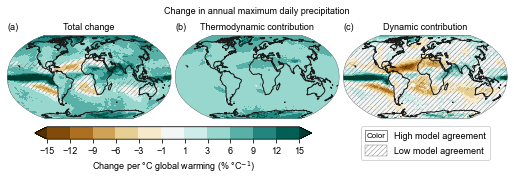

In [4]:
f, axes = plot.map_subplots(1, 3)

levels = [-15, -12, -9, -6, -3, -1, 1, 3, 6, 9, 12, 15]

opt = dict(
    levels=levels,
    cmap="BrBG",
)

suptitle = "Disentangling "

hatch = "/////"
hatch_label = "Low model agreement"
# ====

ax = axes[0]


d = ds.prmax
plot.one_map_flat(d.isel(nf=0), ax=ax, **opt)
legend_handle = plot.hatch_map(ax, d.isel(nf=1), hatch, hatch_label, invert=True)


ax.set_title("Total change", fontsize=9)
ax.set_title("(a)", fontsize=9, loc="left")


# ====

ax = axes[1]


d = ds.scaling_thermo
plot.one_map_flat(d.isel(nf=0), ax=ax, **opt)
legend_handle = plot.hatch_map(ax, d.isel(nf=1), hatch, hatch_label, invert=True)


ax.set_title("Thermodynamic contribution", fontsize=9)
ax.set_title("(b)", fontsize=9, loc="left")


# ====

ax = axes[2]

d = ds.scaling_dyn
h = plot.one_map_flat(d.isel(nf=0), ax=ax, **opt)
legend_handle = plot.hatch_map(ax, d.isel(nf=1), hatch, hatch_label, invert=True)


ax.set_title("Dynamic contribution", fontsize=9)
ax.set_title("(c)", fontsize=9, loc="left")


# ====

cbar = mpu.colorbar(
    h,
    axes[0],
    axes[1],
    size=0.15,
    shrink=0.25 * 0.66,
    orientation="horizontal",
    pad=0.1,
)
cbar.set_label("Change per °C global warming (% °C$^{-1}$)", size=9)
cbar.ax.tick_params(labelsize=9)
cbar.set_ticks(levels)

# ====


th = plot.text_legend(ax, "Color", "High model agreement", size=8)

# ====

f.suptitle("Change in annual maximum daily precipitation", fontsize=9)

side = 0.01
f.subplots_adjust(wspace=0.025, left=side, right=1 - side, bottom=0.315, top=0.81)

axes[2].legend(
    handles=[th, legend_handle],
    handlelength=2.5,
    handleheight=1.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.5),
    fontsize=9,
    borderaxespad=0,
    frameon=True,
    handler_map={mpl.text.Text: plot.TextHandler()},
    ncol=1,
)


mpu.set_map_layout(axes, width=18)

f.canvas.draw()

fN = conf.figure_filename("box_11.1_fig_1", "Box_11.1_Figure_1_Pfahl_2017")
plt.savefig(fN + ".pdf", dpi=300)
plt.savefig(fN + ".png", dpi=300, facecolor="w")